# Develop simulation of strand length 

Choose the actual number of breaks for a given strand using a Poisson distribution and the mean number of breaks per strand. Assume the breaks are uniformly distributed along each strand. Calculate the distance between breaks (the segment lengths) by sorting the breaks according to distance along the strand then subtracting successive break positions. Add the first and and last segemnt lengths (zero to first sorted break, last sorted break to strand length, respectively).   



Date and time  2023-03-16 10:32:16.350646


 
Date and time 2023-03-16 10:32:17.436301
Time since last check is 0:00:01.085655


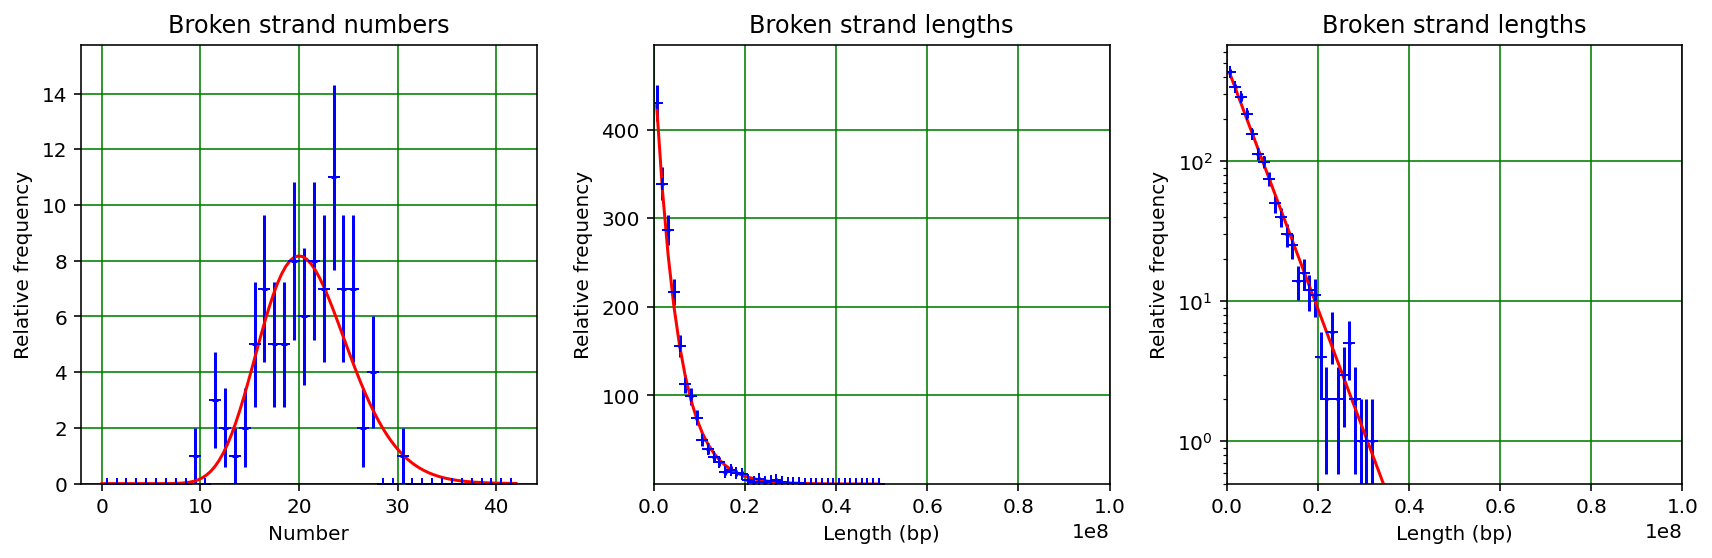

In [1]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import factorial
%matplotlib inline
#
def poisson_func(k, lam):
    '''
    Poisson distribution function.
    Given number of occurences and mean, returns distribution function value.
    '''
    poiss = lam**k*np.exp(-lam)/sp.special.factorial(k, exact=True)
    return poiss
#
# Number of (single) DNA strands
n_strands = 92
#
# Length of DNA strand
L_DNA = 1e8 # base pairs
#
# Average number of breaks per strand, the number of segments generated and their lengths
mean_breaks = 20 
n_segs = np.zeros(n_strands).astype(int)
seg_lengths = np.zeros((n_strands, (mean_breaks + 5*np.sqrt(mean_breaks)).astype(int)))
#
# Set up histgram of number of breaks
num_range = np.zeros(2)
num_range[0] = np.maximum(mean_breaks - 5*np.sqrt(mean_breaks), 0.0).astype(int)
num_range[1] = (mean_breaks + 5*np.sqrt(mean_breaks)).astype(int)
n_num_bins = ((num_range[1] - num_range[0])).astype(int)
num_bins, num_bin_wid = np.linspace(num_range[0], num_range[1], n_num_bins + 1, retstep = True)
num_bin_cents = 0.5*(num_bins[0:n_num_bins] + num_bins[1:n_num_bins + 1])
num_bin_err = num_bin_wid/np.sqrt(12)*np.ones(n_num_bins)
cum_num_hist = np.zeros(n_num_bins)
#
# Set up histogram of segment lengths
n_len_bins = 40
len_bins, len_bin_wid = np.linspace(0.0, 10*L_DNA/mean_breaks, n_len_bins + 1, retstep = True)
len_bin_cents = 0.5*(len_bins[0:n_len_bins] + len_bins[1:n_len_bins + 1])
len_bin_err = len_bin_wid/np.sqrt(12)*np.ones(n_len_bins)
cum_len_hist = np.zeros(n_len_bins)
#
# Initialise random number generator
rng = np.random.default_rng()
#
# Simulate breaks and segements for all strands
for n in range(0, n_strands):
    n_breaks = rng.poisson(mean_breaks)
    breaks = np.zeros(n_breaks)*L_DNA
    n_segs[n] = n_breaks + 1
    breaks = rng.uniform(0.0, 1.0, n_breaks)
    ends = np.zeros(n_segs[n] + 1)
    ends[1:n_segs[n]] = np.sort(breaks)
    ends[n_segs[n]] = 1.0
    seg_lengths[n, 0:n_segs[n]] = L_DNA*(ends[1:n_segs[n] + 1] - ends[0:n_segs[n]])
    #
    num_hist_here, _ = np.histogram(n_breaks, num_bins)
    cum_num_hist += num_hist_here
    #
    len_hist_here, _ = np.histogram(seg_lengths[n, 0:n_segs[n]], len_bins)
    cum_len_hist += len_hist_here
#
# Function describing distribution of number of breaks
n_poiss_plot = 100
k_poiss_plot = np.linspace(num_range[0], num_range[1], n_poiss_plot)
poiss_func_plot = n_strands*num_bin_wid*poisson_func(mean_breaks, k_poiss_plot)
#
# Function describing segment length distribution
len_func_plot = (mean_breaks*(mean_breaks + 1)*n_strands*
                 len_bin_wid/L_DNA*np.exp(-mean_breaks*len_bin_cents/L_DNA))
#
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
#
ax[0].set_title('Broken strand numbers')
ax[0].errorbar(num_bin_cents, cum_num_hist, xerr = num_bin_err, yerr = np.sqrt(cum_num_hist),
               linestyle = '', marker = '+', color = 'b')
ax[0].plot(k_poiss_plot, poiss_func_plot, linestyle = '-', marker = '', color = 'r')
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Relative frequency')
ax[0].set_ylim(0.0, 1.1*(np.amax(cum_num_hist) + np.amax(np.sqrt(cum_num_hist))))
ax[0].grid(color = 'g')
#
ax[1].set_title('Broken strand lengths')
ax[1].errorbar(len_bin_cents, cum_len_hist, xerr = len_bin_err, yerr = np.sqrt(cum_len_hist),
               linestyle = '', marker = '+', color = 'b')
ax[1].plot(len_bin_cents, len_func_plot, linestyle = '-', marker = '', color = 'r')
ax[1].set_xlabel('Length (bp)')
ax[1].set_ylabel('Relative frequency')
ax[1].set_xlim(0.0, L_DNA)
ax[1].set_ylim(0.5, 1.1*(np.amax(cum_len_hist) + np.amax(np.sqrt(cum_len_hist))))
ax[1].grid(color = 'g')
#
ax[2].set_title('Broken strand lengths')
ax[2].errorbar(len_bin_cents, cum_len_hist, xerr = len_bin_err, yerr = np.sqrt(cum_len_hist),
               linestyle = '', marker = '+', color = 'b')
ax[2].plot(len_bin_cents, len_func_plot, linestyle = '-', marker = '', color = 'r')
ax[2].set_xlabel('Length (bp)')
ax[2].set_ylabel('Relative frequency')
ax[2].set_xlim(0.0, L_DNA)
ax[2].set_ylim(0.5, 1.5*(np.amax(cum_len_hist) + np.amax(np.sqrt(cum_len_hist))))
ax[2].set_yscale('log')
ax[2].grid(color = 'g')
#
plt.tight_layout()
plt.show
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

# DNA clumping

Chromosomes are coiled up into roughly spherical structures when not undergoing mitosis. The typical diameter of the sphere is about 3 to 4 $\mu$m. Put one end of each strand inside a sphere of radius 2 $\mu$m. (The breaks are assumed not to influence this intial structure!) Nuclear diameter about 20 $\mu$m. See [here](https://www.nature.com/scitable/topicpage/chromosomes-14121320/) for information on mouse nucleus!.



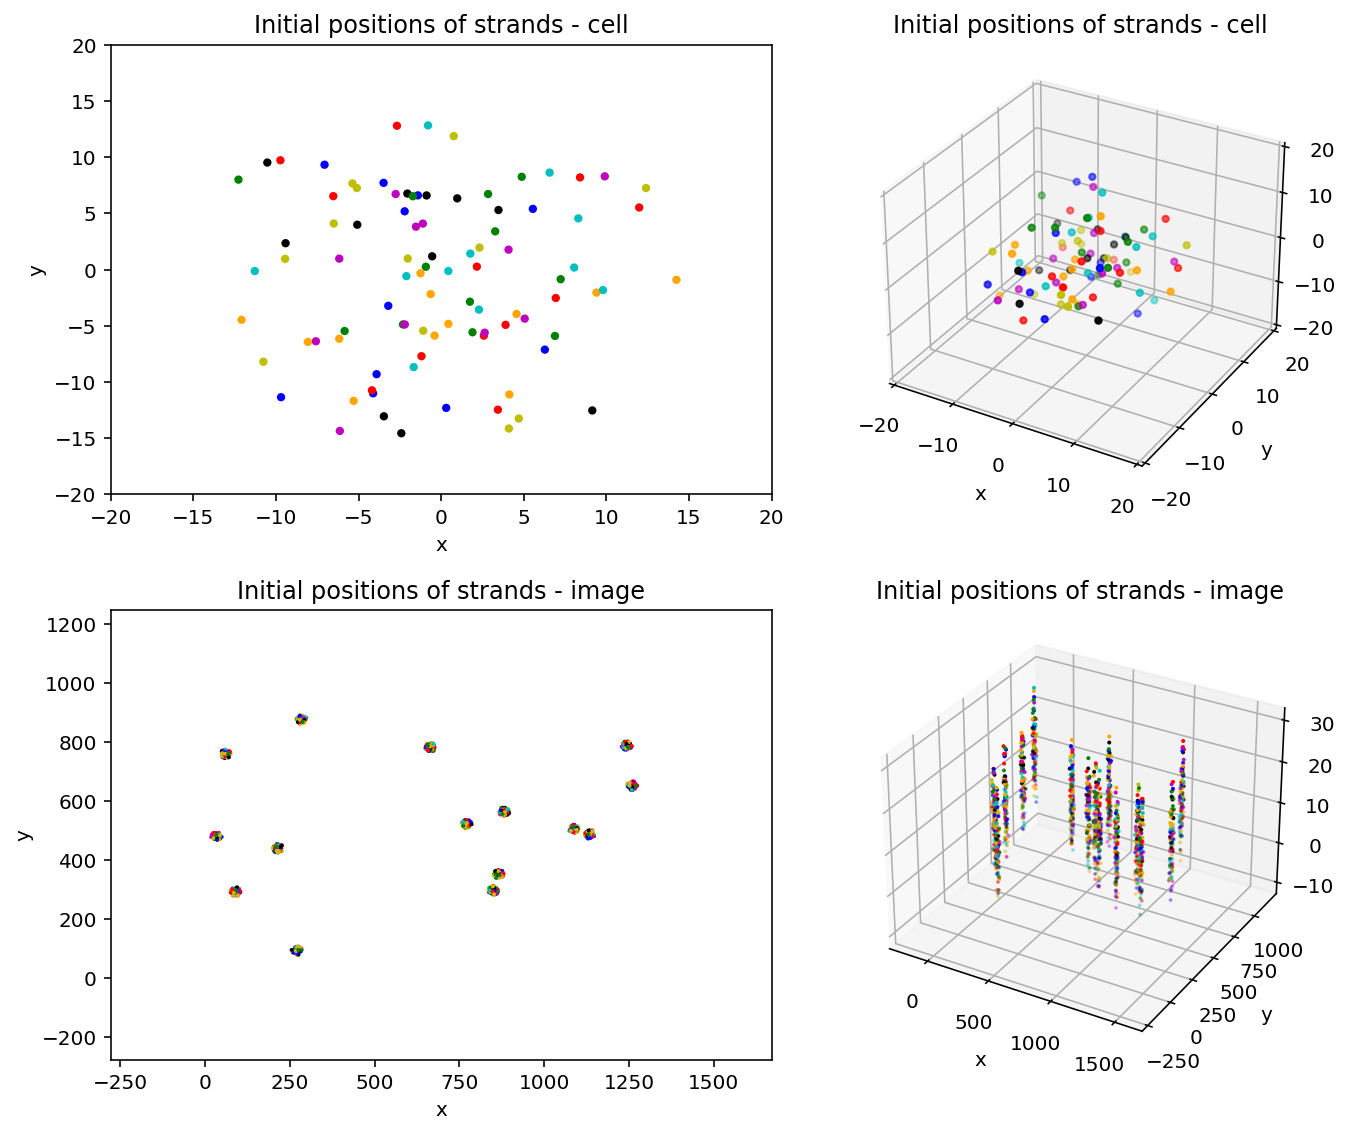

In [2]:
from mpl_toolkits.mplot3d import Axes3D
#
use_sphere = True
#
# Radius of nucleus
rad_nuc = 2.0 # microns
rad_nuc_min = 1.5 # microns
sig_rad_nuc = 0.5 # microns
#
# Radius of cell
rad_cell = 10.0 # microns
rad_cell_min = 16.0 # microns
sig_rad_cell = 1.0 # microns
#
# Colot table for plots
n_color_tab = 8
color_tab = np.array(['r', 'orange', 'y', 'g', 'c', 'b', 'm', 'k'])
#
fig = plt.figure(figsize = (10, 8))
#
ax2d_cell = fig.add_subplot(2, 2, 1)
ax2d_cell.set_title("Initial positions of strands - cell")
ax2d_cell.set_xlabel("x")
ax2d_cell.set_ylabel("y")
#
ax3d_cell = fig.add_subplot(2, 2, 2, projection='3d')
ax3d_cell.set_title("Initial positions of strands - cell")
ax3d_cell.set_xlabel("x")
ax3d_cell.set_ylabel("y")
ax3d_cell.set_zlabel("z")
#
ax2d_pic = fig.add_subplot(2, 2, 3)
ax2d_pic.set_title("Initial positions of strands - image")
ax2d_pic.set_xlabel("x")
ax2d_pic.set_ylabel("y")
#
ax3d_pic = fig.add_subplot(2, 2, 4, projection='3d')
ax3d_pic.set_title("Initial positions of strands - image")
ax3d_pic.set_xlabel("x")
ax3d_pic.set_ylabel("y")
ax3d_pic.set_zlabel("z")
#
# Image dimensions
n_rows = 1040 # number of rows of pixels (y coord)
n_cols = 1392 # number of columns of pixels (x coord)
depth = 20
#
# Set up number of cells and their positions
n_cells = 15
x_cell = np.zeros(n_cells)
y_cell = np.zeros(n_cells)
z_cell = np.zeros(n_cells)
#
# Set location of cells
if n_cells == 1:
    x_cell[0] = n_cols/2
    y_cell[0] = n_rows/2
    z_cell[0] = depth/2
else:
    x_cell = np.random.uniform(0, n_cols, n_cells)
    y_cell = np.random.uniform(0, n_rows, n_cells)
    z_cell = np.random.uniform(0, depth, n_cells)

#
# Colors for plotting strands
colors = np.zeros(n_strands).astype(str)
#
for n_cell in range(0, n_cells):
    #
    # Simulate uniform radial and phi initial distribution of strands
    rad_arr = np.sqrt(np.random.uniform(0, max(np.random.normal(rad_cell, sig_rad_cell, 1),
                                              rad_cell_min)**2, n_strands))
    phi_arr = np.random.uniform(0, 2*np.pi, n_strands)
    #
    # Determine initial coordinates of strands (simulate uniform intial theta distribution if required)
    if use_sphere:
        theta_arr = np.arccos(np.random.uniform(-1, 1, n_strands))
        x_arr = x_cell[n_cell] + rad_arr*np.sin(theta_arr)*np.cos(phi_arr)
        y_arr = y_cell[n_cell] + rad_arr*np.sin(theta_arr)*np.sin(phi_arr)
        z_arr = z_cell[n_cell] + rad_arr*np.cos(theta_arr)
    else:
        x_arr = x_cell[n_cell] + rad_arr*np.cos(phi_arr)
        y_arr = y_cell[n_cell] + rad_arr*np.sin(phi_arr)
        z_arr = x_cell[n_cell] + np.random.uniform(0, depth, n_strands)
    #
    # Plot intial positions of all strands in image
    col_inds = (np.linspace(0, n_strands - 1, n_strands)%n_color_tab).astype(int)
    ax2d_pic.scatter(x_arr, y_arr, color = color_tab[col_inds], s = 1.0)
    ax3d_pic.scatter(x_arr, y_arr, z_arr, color = color_tab[col_inds], s = 1.0)
    #
    if n_cell > 0:
        continue
    #
    # Plot initial positions of strands in one cell 
    ax2d_cell.scatter(x_arr - x_cell[n_cell], y_arr - y_cell[n_cell], color = color_tab[col_inds], s = 10.0)
    ax3d_cell.scatter(x_arr - x_cell[n_cell], y_arr - y_cell[n_cell], 
                      z_arr - z_cell[n_cell], color = color_tab[col_inds], s = 10.0)    
#
scale_cell = 2.0
ax2d_cell.set_xlim(-scale_cell*rad_cell, scale_cell*rad_cell)
ax2d_cell.set_ylim(-scale_cell*rad_cell, scale_cell*rad_cell)
#
ax3d_cell.set_xlim(-scale_cell*rad_cell, scale_cell*rad_cell)
ax3d_cell.set_ylim(-scale_cell*rad_cell, scale_cell*rad_cell)
ax3d_cell.set_zlim(-scale_cell*rad_cell, scale_cell*rad_cell)
#
expand_pic = 0.2
ax2d_pic.set_xlim(-expand_pic*n_cols, (1 + expand_pic)*n_cols)
ax2d_pic.set_ylim(-expand_pic*n_cols, (1 + expand_pic)*n_rows)
#
ax3d_pic.set_xlim(-expand_pic*n_cols, (1 + expand_pic)*n_cols)
ax3d_pic.set_ylim(-expand_pic*n_cols, (1 + expand_pic)*n_rows)
ax3d_pic.set_zlim(-(1 + expand_pic)*rad_cell, depth + (1 + expand_pic)*rad_cell)
#
plt.tight_layout()
plt.show()

## Motion of DNA in agarose

Date and time  2023-03-16 10:32:19.364952
 
Parameters used to descibe vD in agarose
kB = 2.24
kC = 0.56
kL = 0.59
alpha = 1.34


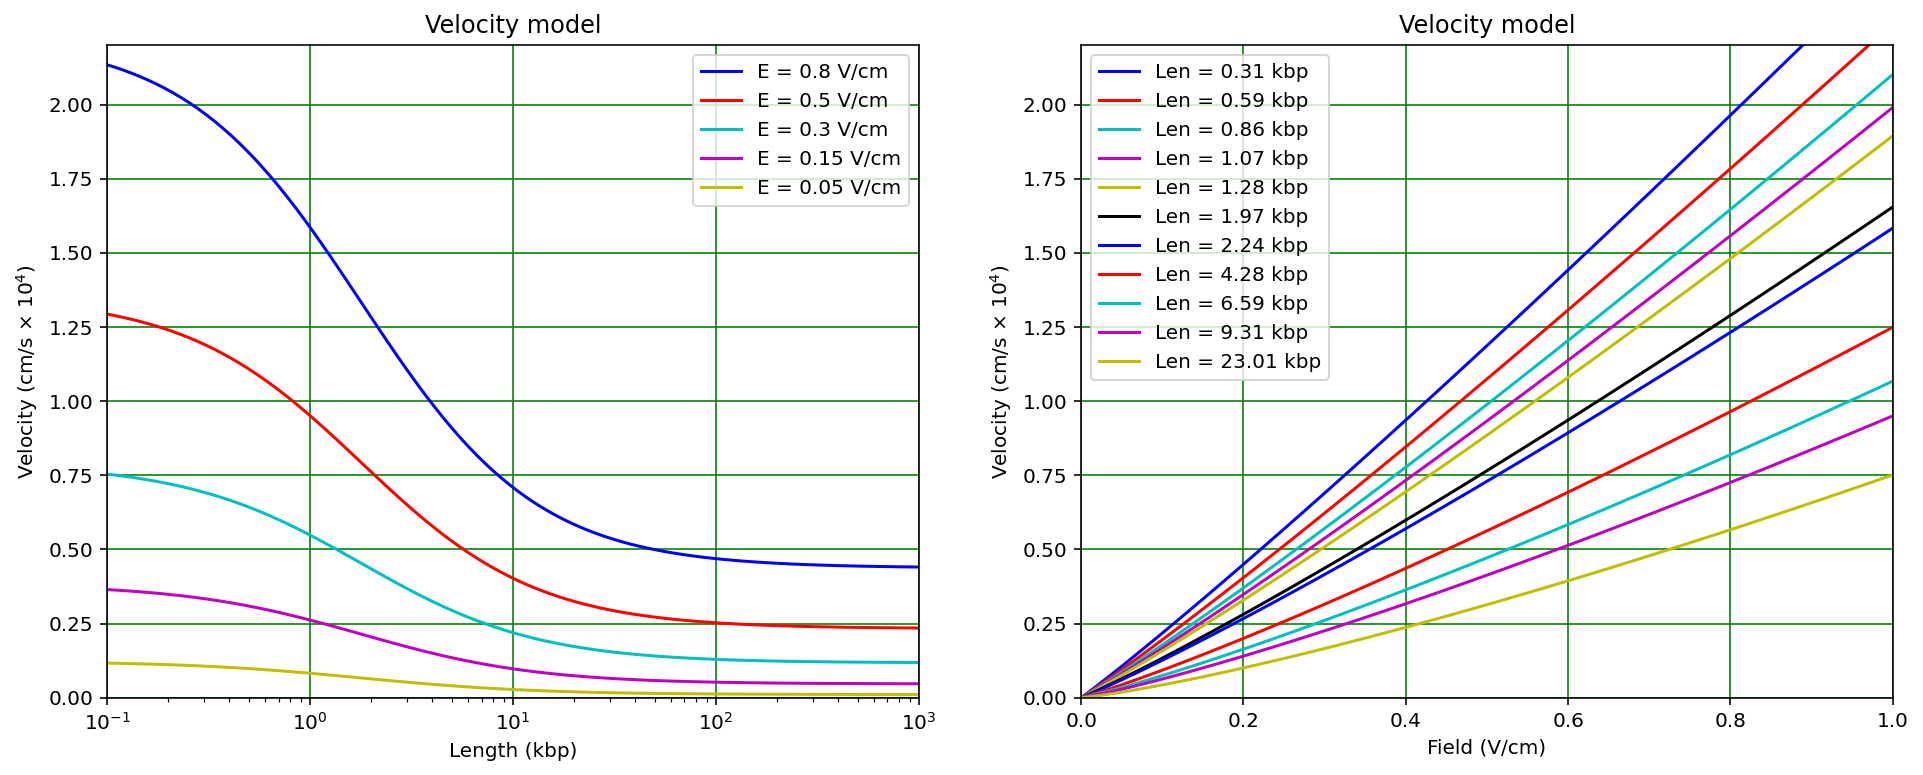

 
Date and time 2023-03-16 10:32:20.356644
Time since last check is 0:00:00.991692


In [3]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
def vDagarose(L, E):
    '''
    Given length of DNA strand (in kbp) and electric field (in V/cm) returns 
    velocity in agarose (in cm/s * 10^4 or equivalently microns/s).
    '''
    if not hasattr(vDagarose, "kB"):
        vDagarose.kB, vDagarose.kC, vDagarose.kL, vDagarose.alpha = 2.24, 0.56, 0.59, 1.34
        print(" ")
        print("Parameters used to descibe vD in agarose")
        print("kB = {:.2f}".format(vDagarose.kB))
        print("kC = {:.2f}".format(vDagarose.kC))
        print("kL = {:.2f}".format(vDagarose.kL))
        print("alpha = {:.2f}".format(vDagarose.alpha))
    #
    vD = vDagarose.kB*E/(1 + vDagarose.kC*L) + vDagarose.kL*E**vDagarose.alpha
    #
    return vD
#
# Calculate fitted function values x direction
nPlot = 100
xBot = 0.1
xTop = 1000.0
xPlot = np.exp(np.linspace(np.log(xBot), np.log(xTop), nPlot))
nY = 5
yVals = np.array([0.05, 0.15, 0.3, 0.5, 0.8]) # V/cm
#
# Calculate fitted function values y direction
yBot = 0.0
yTop = 1.0
yPlot = np.linspace(yBot, yTop, nPlot)
nX = 11
xVals = np.array([0.31, 0.59, 0.86, 1.07, 1.28, 1.97, 2.24, 4.28, 6.59, 9.31, 23.01]) # kbp
#
# Plot data
nColTab = 6
colTab = ['b', 'r', 'c', 'm', 'y', 'k']
#
fig = plt.figure(figsize = (16, 6))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Velocity model')
ax.set_xlabel('Length (kbp)')
ax.set_ylabel('Velocity (cm/s $\\times$ $10^4$)')
nCol = 0
for plot in range(nY, 0, -1):
    fitPlotX = vDagarose(xPlot, yVals[plot - 1]*np.ones(nPlot))
    ax.plot(xPlot, fitPlotX, linestyle = '-', color = colTab[nCol], label = "E = " + str(yVals[plot - 1]) + " V/cm")
    nCol += 1
    if nCol > nColTab - 1:
        nCol = 0
ax.set_xlim(xBot, xTop)
ax.set_ylim(0, 2.2)
ax.set_xscale('log')
ax.grid(color = 'g')
ax.legend()    
#   
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Velocity model')
ax.set_xlabel('Field (V/cm)')
ax.set_ylabel('Velocity (cm/s $\\times$ $10^4$)')
nCol = 0
for plot in range(0, nX):
    fitPlotY = vDagarose(xVals[plot]*np.ones(nPlot), yPlot)
    ax.plot(yPlot, fitPlotY, linestyle = '-', color = colTab[nCol], label = "Len = " + str(xVals[plot]) + " kbp")
    nCol += 1
    if nCol > nColTab - 1:
        nCol = 0
ax.set_xlim(yBot, yTop)
ax.set_ylim(0, 2.2)
ax.grid(color = 'g')
ax.legend()    
#
# plt.savefig("FitPlot.png")
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Drift of segments



E_field = 1.0 # V/cm
drift_time = 25*60


#n_strands = 91
#L_DNA = 1e8
#mean_breaks = 20
#n_segs = np.zeros(n_strands).astype(int)
#seg_lengths = np.zeros((n_strands, (mean_breaks + 5*np.sqrt(mean_breaks)).astype(int)))


for n in range(0, n_strands):
    n_breaks = rng.poisson(mean_breaks)
    breaks = np.zeros(n_breaks)
    n_segs[n] = n_breaks + 1
    breaks = rng.uniform(0.0, 1.0, n_breaks)
    ends = np.zeros(n_segs[n] + 1)
    ends[1:n_segs[n]] = np.sort(breaks)
    ends[n_segs[n]] = 1.0
    seg_lengths[n, 0:n_segs[n]] = L_DNA*(ends[1:n_segs[n] + 1] - ends[0:n_segs[n]])
    #
    num_hist_here, _ = np.histogram(n_breaks, num_bins)
    cum_num_hist += num_hist_here
    #
    len_hist_here, _ = np.histogram(seg_lengths[n, 0:n_segs[n]], len_bins)
    cum_len_hist += len_hist_here
    #


plt.hist(n_breaks, num_bins)
plt.title('Number of strand breaks') # mean value about 20
plt.show()
#
plt.hist(seg_lengths[n, 0:n_segs[n]], len_bins)
plt.title('Segment lengths')
plt.show()
#
plt.plot(cum_num_hist)
plt.title('Number of breaks')
plt.show()
plt.plot(cum_len_hist)
plt.title('Cumulative length histogram') # shape follows expected from calladine
plt.show()
#
drift_dist = np.zeros((n_strands, max(n_segs)))
#
n_strands = 2 #won't work for 1
for n in range(0, n_strands):
    drift_dist[n, 0:n_segs[n]] = vDagarose(seg_lengths[n, 0:n_segs[n]]/1000, E_field)*drift_time # um

print("drift_dist[1, 0:4]", drift_dist[1, 0:4])
print("drift_dist[1, 0:18]", drift_dist[1, 0:18]) # 18 segments
plt.plot(drift_dist[1, 0:18])
plt.title('drift distance for n_strands = 2')
plt.show()
#
n_strands = 91
for n in range(0, n_strands):
    drift_dist[n, 0:n_segs[n]] = vDagarose(seg_lengths[n, 0:n_segs[n]]/1000, E_field)*drift_time # um
#
print("drift_dist[1, 0:4]", drift_dist[1, 0:4])
print("drift_dist[1, 0:18]", drift_dist[1, 0:18]) # 18 segments
plt.plot(drift_dist[1, 0:18])
plt.title('drift distance for n_strands = 91')
plt.show()







Segment lengths: [ 3212035.47086292 16227919.161862    8189026.67205281  5009238.55567876
  5198696.12772681  8472149.03206864   541036.05189531  6536051.98143512
  1743874.83284395  9801097.57458019  2385414.6328486   8566441.87537017
 10312759.19226067   885914.07147073  1997476.67604455  2899758.36749453
  8021109.72350424]


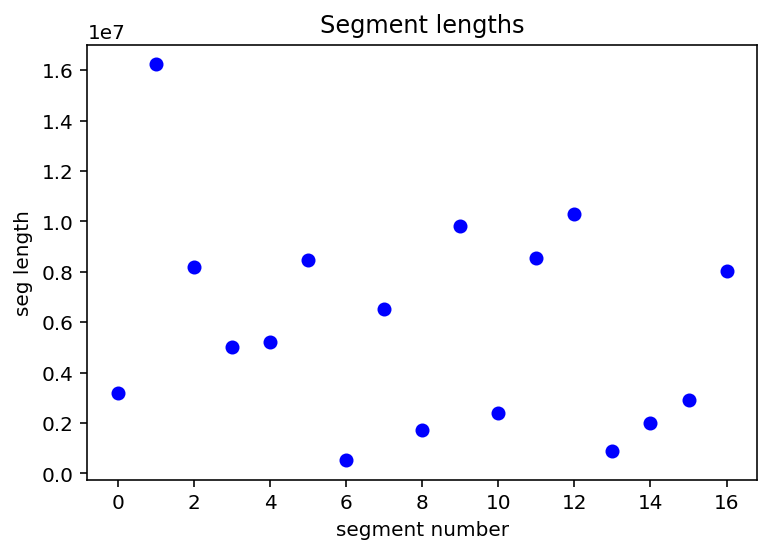

[541036.051895305, 885914.0714707281, 1743874.8328439503, 1997476.6760445517, 2385414.6328486037, 2899758.3674945314, 3212035.470862917, 5009238.555678763, 5198696.127726809, 6536051.98143512, 8021109.723504239, 8189026.672052813, 8472149.032068644, 8566441.875370167, 9801097.574580187, 10312759.192260668, 16227919.161862003]


Text(0.5, 1.0, 'sorted seg lengths')

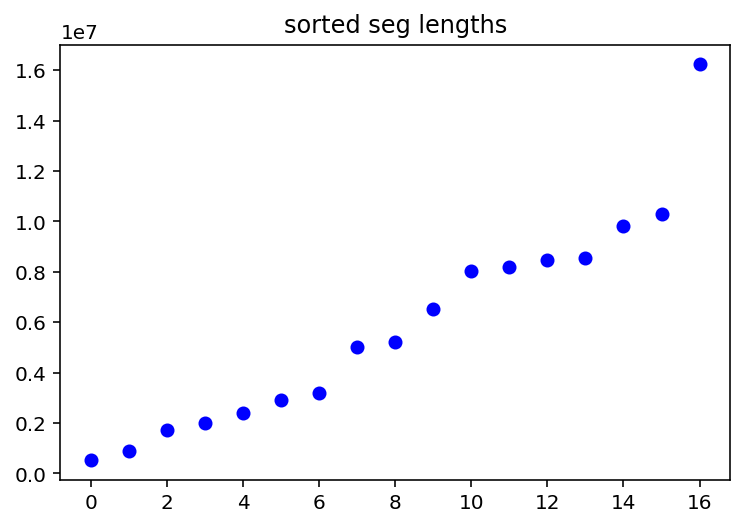

In [11]:
print('Segment lengths:', seg_lengths[n, 0:n_segs[n]])
#lst.sort(key = len)
plt.plot(seg_lengths[n, 0:n_segs[n]],'ob')
plt.title('Segment lengths')
plt.xlabel('segment number')
plt.ylabel('seg length')
plt.show()


sorted_seg_lengths = sorted(seg_lengths[n, 0:n_segs[n]], key=float)
print(sorted_seg_lengths)
plt.plot(sorted_seg_lengths,'ob')
plt.title('sorted seg lengths')

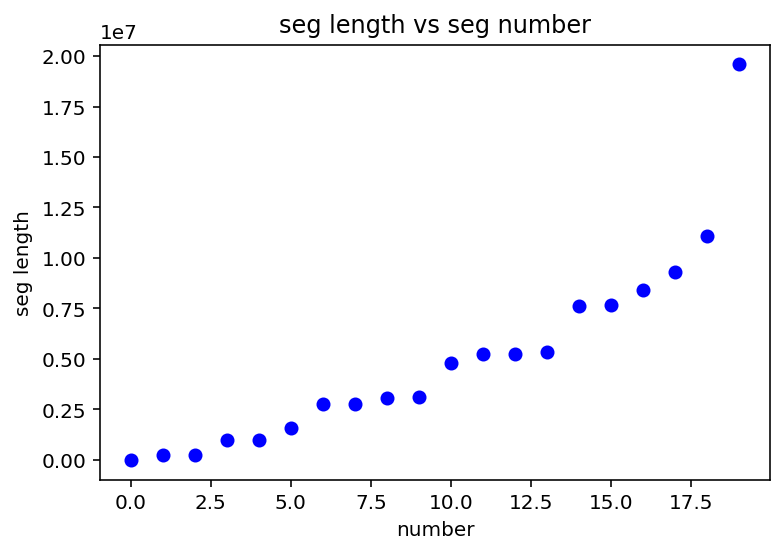

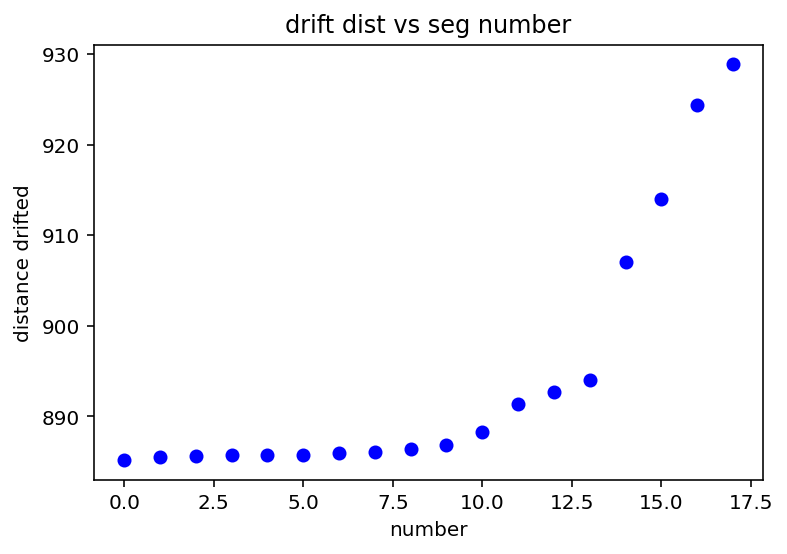

In [6]:
# assume all points same start point

sorted_seg_lengths = sorted(seg_lengths[n, 0:n_segs[n]], key=float)
plt.plot(sorted_seg_lengths,'ob')
plt.title('seg length vs seg number')
plt.xlabel('number')
plt.ylabel('seg length')
plt.show()


# now find seg drift
n_strands = 1
for n in range(0, n_strands):
    drift_dist[n, 0:n_segs[n]] = vDagarose(seg_lengths[n, 0:n_segs[n]]/1000, E_field)*drift_time # um
#
sorted_drift_dist = sorted(drift_dist[n, 0:n_segs[n]], key=float)
plt.plot(sorted_drift_dist, 'ob')
plt.title('drift dist vs seg number')
plt.xlabel('number')
plt.ylabel('distance drifted')
plt.show()

1. Need to link seg length to drit dist



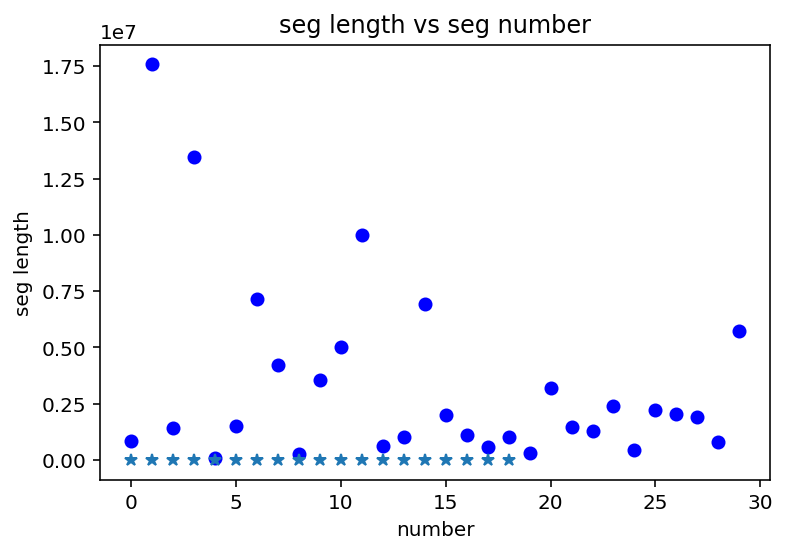

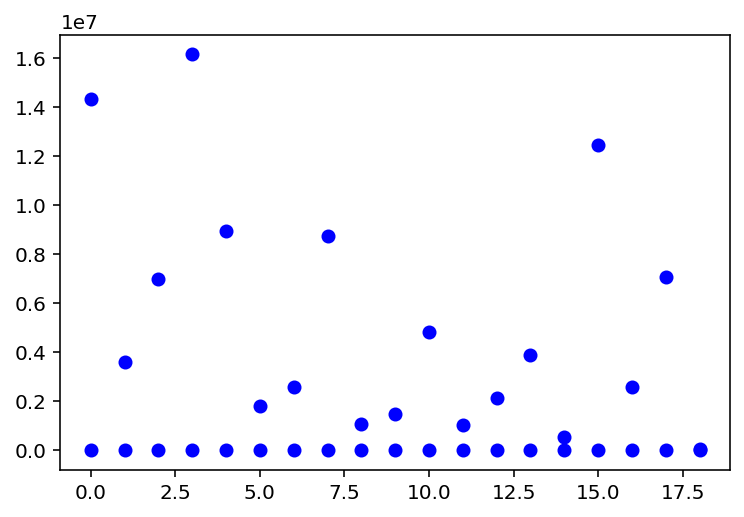

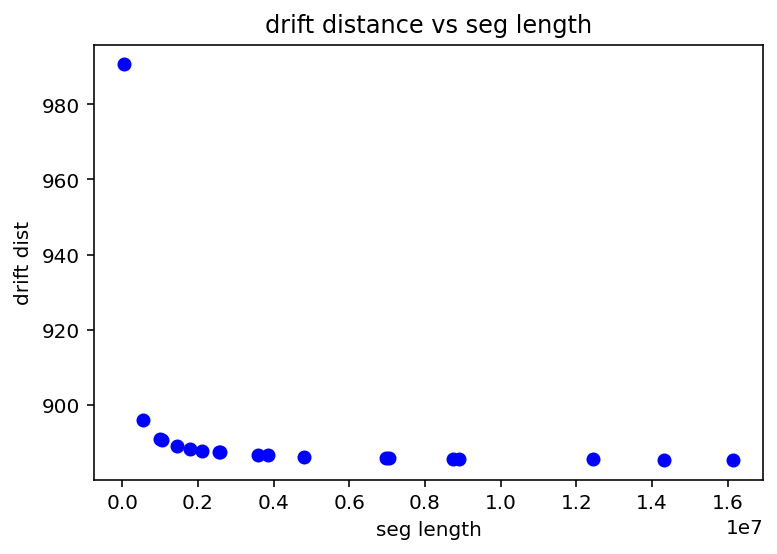

In [6]:
# unsorted

sorted_seg_lengths = sorted(seg_lengths[n, 0:n_segs[n]], key=float)
plt.plot(seg_lengths[n, 0:n_segs[n]],'ob')
plt.title('seg length vs seg number')
plt.xlabel('number')
plt.ylabel('seg length')
#plt.show()


# now find seg drift
n_strands = 1
for n in range(0, n_strands):
    drift_dist[n, 0:n_segs[n]] = vDagarose(seg_lengths[n, 0:n_segs[n]]/1000, E_field)*drift_time # um
#
sorted_drift_dist = sorted(drift_dist[n, 0:n_segs[n]], key=float)
plt.plot(drift_dist[n, 0:n_segs[n]], '*')
#plt.title('drift dist vs seg number')
#plt.xlabel('number')
#plt.ylabel('distance drifted')
#plt.legend()
plt.show()

#plt.plot(seg_lengths[n, 0:n_segs[n]],'ob')

list_drift_dist = drift_dist[n, 0:n_segs[n]]
list_seg_lengths = seg_lengths[n, 0:n_segs[n]]

# create 2D array of seg_lengths with corresponding drift_dist
length_drift_array = list(zip(list_seg_lengths, list_drift_dist))
plt.plot(length_drift_array,'ob')
plt.show()

plt.plot(list_seg_lengths, list_drift_dist, 'ob')
plt.title('drift distance vs seg length')
plt.xlabel('seg length')
plt.ylabel('drift dist')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (19,) and (24,)

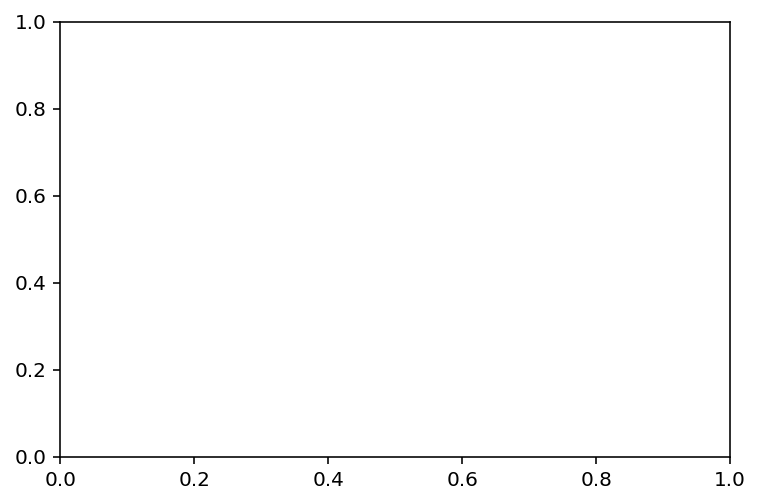

In [7]:
# Draw lines representing segment drift on x direction in plot with increasing y values so get first impression of what comet will look like.
n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
#plt.plot(n, list_seg_lengths)
#plt.show()
plt.plot(list_seg_lengths, n)
plt.title('Seg number vs length')
plt.show()
#plt.plot(n, list_drift_dist)
#plt.show()
#plt.plot(list_drift_dist, n)
#plt.show()

# units seem quite off.
micro_drift_dist = list_drift_dist
plt.plot(micro_drift_dist, n)
plt.title('Seg number vs drift distance')
plt.show()

plt.plot(list_seg_lengths, micro_drift_dist, label='drift dist as func of seg length', linestyle = '', marker = 'o' )
plt.title('drift dist and seg length')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

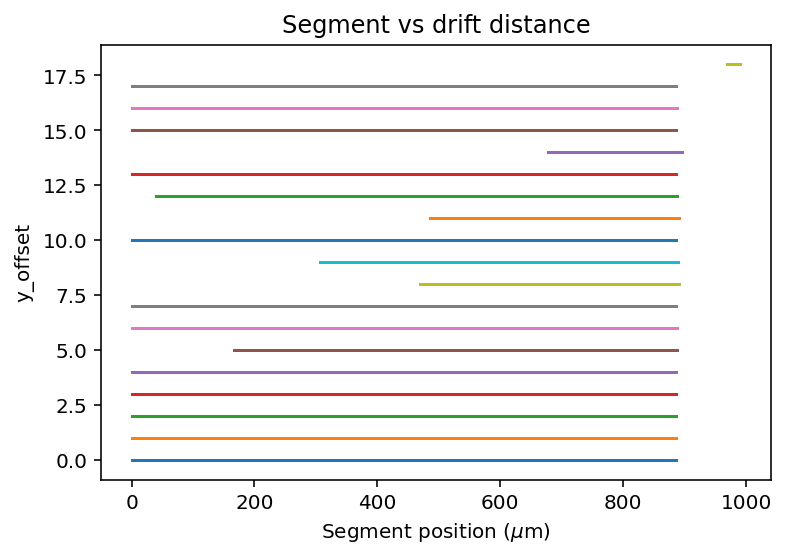

In [8]:
bp_to_mum = 1e6*0.04/1e8
# Draw lines representing segment drift on x direction in plot with increasing y values so get first impression of what comet will look like.
y_offset = np.linspace(0, )
#seg_lengths[n, 0:n_segs[n]]
# units seem quite off.
right = list_drift_dist
left = np.maximum(right - list_seg_lengths*bp_to_mum, 0.0)
for n_seg in range(0, len(left)):
    plt.plot([left[n_seg], right[n_seg]], [y_offset[n_seg], y_offset[n_seg]])
plt.title('Segment vs drift distance')
plt.xlabel("Segment position ($\mu$m)")
plt.ylabel("y_offset")
#plt.savefig('Segmentvsdrift.png')
plt.show()
